In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df_sales= pd.read_excel(r'C:\Users\OzturkNa\Downloads\Py\Recomm\Sales_data3.xlsx')

In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerNo  2559 non-null   float64
 1   MaterialNo  2531 non-null   float64
 2   Quantity    2560 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 60.1 KB


In [5]:
df_sales.describe()

,CustomerNo,MaterialNo,Quantity
count,2.559000e+03,2.531000e+03,2560.000000
mean,1.056175e+07,8.117439e+06,139.979297
std,3.654160e+06,1.344602e+07,730.613551
min,1.000103e+07,1.008949e+06,0.000000
25%,1.003637e+07,2.715194e+06,41.000000
50%,1.024690e+07,3.933333e+06,55.000000
75%,1.072803e+07,4.512354e+06,100.000000
max,9.411100e+07,4.633744e+07,30000.000000


In [6]:
df_sales=df_sales.dropna()

In [8]:
df_sales['CustomerNo']= df_sales['CustomerNo'].astype(int).astype(str)
df_sales['MaterialNo']= df_sales['MaterialNo'].astype(int).astype(str)


In [9]:
df_sales.describe()

,Quantity
count,2531.000000
mean,141.583169
std,734.634332
min,0.000000
25%,42.000000
50%,55.000000
75%,100.000000
max,30000.000000


In [16]:
# Aggregate sales quantities for each product
product_sales = df_sales.groupby('MaterialNo')['Quantity'].sum().reset_index()

# Sort products based on aggregated sales quantities in descending order
top_10_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Display the top 10 products
#print(top_10_products)

In [17]:
# Aggregate sales quantities for each product
customers = df_sales.groupby('CustomerNo')['Quantity'].sum().reset_index()

# Sort products based on aggregated sales quantities in descending order
top_10_customers = customers.sort_values(by='Quantity', ascending=False).head(10)

# Display the top 10 products
print(top_10_customers)

    CustomerNo  Quantity
571   11013554    113874
39    10008542     20421
566   10992249      8067
50    10009458      7470
137   10046709      7024
122   10045102      6660
147   10050211      6180
473   10749197      5622
33    10008146      5460
429   10681817      4992


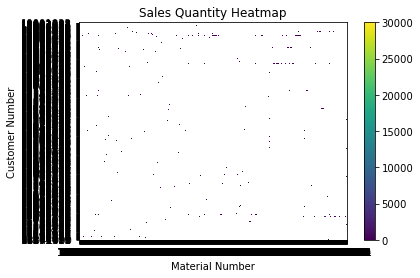

In [18]:
# Pivot the data to create a heatmap
heatmap_data = df_sales.pivot_table(index='CustomerNo', columns='MaterialNo', values='Quantity', aggfunc='sum')

# Create the heatmap
plt.imshow(heatmap_data, cmap='viridis', interpolation='nearest', aspect='auto')

# Add labels and title
plt.xlabel('Material Number')
plt.ylabel('Customer Number')
plt.title('Sales Quantity Heatmap')

# Customize the axis ticks and labels
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

# Display the colorbar
plt.colorbar()

# Display the heatmap
plt.show()

In [19]:
df_clicks= pd.read_csv(r'C:\Users\OzturkNa\Downloads\Py\Recomm\Product_views2.csv', sep='\\t', index_col=False)
#df_clicks.head()

<ipython-input-19-16a1ee213920>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_clicks= pd.read_csv(r'C:\Users\OzturkNa\Downloads\Py\Recomm\Product_views2.csv', sep='\\t', index_col=False)


In [20]:
df_clicks.rename(columns={'ï»¿"Products': 'Products'}, inplace=True)
df_clicks['Products']= df_clicks['Products'].str[1:]
df_clicks.drop(['Qty Product Added to Cart', 'Qty Purchased Products', 'Products in Basket Avg"'], axis=1, inplace=True)
#df_clicks.head()

In [21]:
df_clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26797 entries, 0 to 26796
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Products           26797 non-null  object
 1   Qty Product Views  26797 non-null  object
dtypes: object(2)
memory usage: 418.8+ KB


In [22]:
df_clicks=df_clicks.dropna()
df_clicks= df_clicks[~(df_clicks['Qty Product Views']=='-')]

In [23]:
df_clicks['Qty Product Views']= df_clicks['Qty Product Views'].astype(int)
#df_clicks.head()

In [27]:
df_product= pd.read_csv(r'C:\Users\OzturkNa\Downloads\Py\Recomm\zmm92_1010_rec2.txt', sep='\\t')
#df_product.head()

<ipython-input-27-ab34cf030cec>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_product= pd.read_csv(r'C:\Users\OzturkNa\Downloads\Py\Recomm\zmm92_1010_rec2.txt', sep='\\t')


In [28]:
df_product.columns

Index(['"', 'Material', 'C-Net', 'Productstatus', 'Manufact."'], dtype='object')

In [29]:
df_product= df_product.dropna()
df_product.drop(['"', 'Productstatus', 'Manufact."'], axis=1, inplace=True)
df_product['C-Net'].fillna(0)
#df_product.head()

13         X
23         X
446        X
584        X
590        X
          ..
1048425    X
1048426    X
1048427    X
1048428    X
1048551    X
Name: C-Net, Length: 15406, dtype: object

In [30]:
df_product['C-Net']= np.where(df_product['C-Net']=='X', 1,0)
#df_product.head()

In [31]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15406 entries, 13 to 1048551
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Material  15406 non-null  object
 1   C-Net     15406 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 300.9+ KB


In [32]:
df= pd.merge(df_sales, df_clicks, left_on='MaterialNo', right_on='Products', how='left')
#df.head()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 2530
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerNo         2531 non-null   object 
 1   MaterialNo         2531 non-null   object 
 2   Quantity           2531 non-null   int64  
 3   Products           1301 non-null   object 
 4   Qty Product Views  1301 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 118.6+ KB


In [34]:
df= pd.merge(df, df_product, left_on='MaterialNo', right_on='Material', how='left')
#df.head()

In [35]:
df.drop(['Products', 'Material'], axis=1, inplace=True)
#df.head()

In [36]:
df['C-Net'].fillna(0, inplace=True)
#df.head()

In [37]:
df.columns

Index(['CustomerNo', 'MaterialNo', 'Quantity', 'Qty Product Views', 'C-Net'], dtype='object')

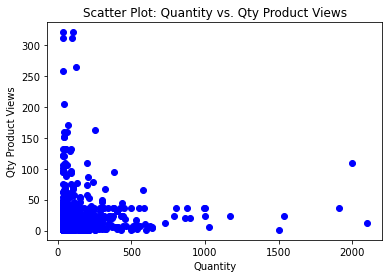

In [38]:
# Create the scatter plot
plt.scatter(df['Quantity'], df['Qty Product Views'], color='b', marker='o')

# Add labels and title
plt.xlabel('Quantity')
plt.ylabel('Qty Product Views')
plt.title('Scatter Plot: Quantity vs. Qty Product Views')

# Display the plot
plt.show()

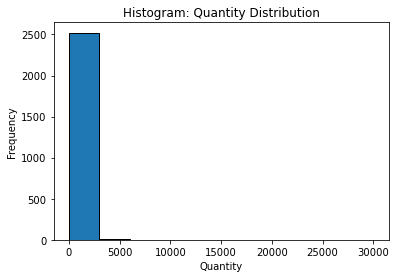

In [39]:
# Create the histogram
plt.hist(df['Quantity'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram: Quantity Distribution')

# Display the plot
plt.show()

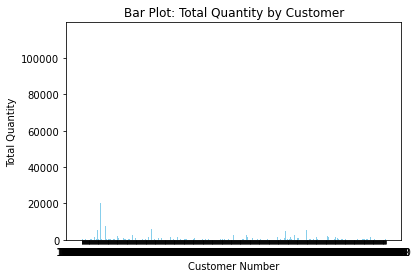

In [40]:
# Calculate total quantity for each customer
customer_quantity = df.groupby('CustomerNo')['Quantity'].sum()

# Create the bar plot
plt.bar(customer_quantity.index, customer_quantity.values, color='skyblue')

# Add labels and title
plt.xlabel('Customer Number')
plt.ylabel('Total Quantity')
plt.title('Bar Plot: Total Quantity by Customer')

# Display the plot
plt.show()

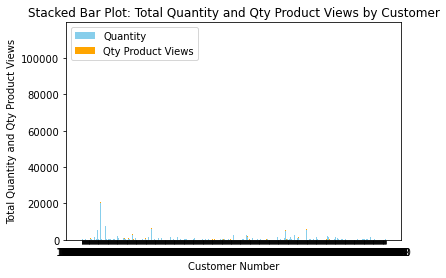

In [41]:
# Calculate total quantity and total product views for each customer
customer_data = df.groupby('CustomerNo').agg({'Quantity': 'sum', 'Qty Product Views': 'sum'})

# Create the stacked bar plot
plt.bar(customer_data.index, customer_data['Quantity'], color='skyblue', label='Quantity')
plt.bar(customer_data.index, customer_data['Qty Product Views'], bottom=customer_data['Quantity'], color='orange', label='Qty Product Views')

# Add labels and title
plt.xlabel('Customer Number')
plt.ylabel('Total Quantity and Qty Product Views')
plt.title('Stacked Bar Plot: Total Quantity and Qty Product Views by Customer')
plt.legend()

# Display the plot
plt.show()

In [42]:
df1=df

In [43]:
# Calculate ratings based on weighted average
weights = {'sales_quantities': 0.6, 'clicks': 0.3, 'info_weight': 0.1}
df['user_rating'] = df.apply(lambda row: row['Quantity'] * weights['sales_quantities'] +
                                    row['Qty Product Views'] * weights['clicks'] +
                                    row['C-Net'] * weights['info_weight'], axis=1)


In [44]:
#df.head()

In [45]:
df['user_rating'].fillna(0, inplace=True)

In [46]:
# Rescale the ratings between 1 and 5 (integer)
min_rating = df['user_rating'].min()
max_rating = df['user_rating'].max()
df['user_rating'] = ((df['user_rating'] - min_rating) / (max_rating - min_rating) * 4 + 1).round().astype(int)
#df.head()

In [47]:
df['user_rating'].nunique()

5

In [48]:
df.fillna(0, inplace=True)

In [49]:
df.columns

Index(['CustomerNo', 'MaterialNo', 'Quantity', 'Qty Product Views', 'C-Net',
       'user_rating'],
      dtype='object')

In [50]:
df['Quantity'].max()

30000

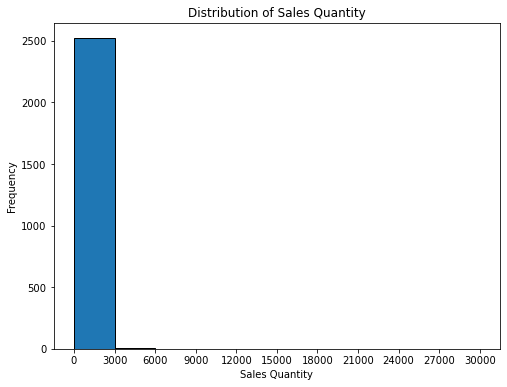

In [51]:
# Sort the data by 'sales_qty'
df = df.sort_values(by='Quantity')

# Plot the histogram for sales_qty
plt.figure(figsize=(8, 6))
plt.hist(df['Quantity'], bins=10, edgecolor='black')
plt.xlabel('Sales Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Quantity')

# Set x-axis ticks based on the maximum sales quantity
max_sales_qty = df['Quantity'].max()
plt.xticks(range(0, max_sales_qty + 1, max_sales_qty // 10))  # Adjust the step size of ticks if needed

plt.show()

In [52]:
# Split the data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Create the feature matrix and target variable for training
X_train = train_data[['CustomerNo', 'MaterialNo', 'Quantity', 'Qty Product Views', 'C-Net']]
y_train = train_data['user_rating']

# Create the feature matrix and target variable for testing
X_test = test_data[['CustomerNo', 'MaterialNo', 'Quantity', 'Qty Product Views', 'C-Net']]
y_test = test_data['user_rating']

In [53]:
# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_train[['Quantity', 'Qty Product Views', 'C-Net']] = scaler.fit_transform(X_train[['Quantity', 'Qty Product Views', 'C-Net']])
X_test[['Quantity', 'Qty Product Views', 'C-Net']] = scaler.transform(X_test[['Quantity', 'Qty Product Views', 'C-Net']])

<ipython-input-53-8f79922cb443>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['Quantity', 'Qty Product Views', 'C-Net']] = scaler.fit_transform(X_train[['Quantity', 'Qty Product Views', 'C-Net']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-53-8f79922cb443>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [54]:
# Convert categorical features to numerical using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [55]:
# Align the training and testing data to ensure consistent columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

In [56]:
# Find the optimal K using the elbow method
k_values = range(1, 11)
mae_values = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    y_pred = np.round(y_pred).astype(int)
    y_pred = np.clip(y_pred, 1, 5)  # Ensure predicted ratings are within 1 to 5 range
    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

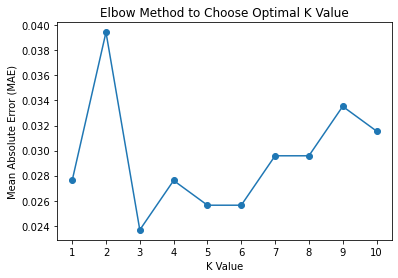

In [57]:
# Plot the Mean Absolute Error against K values
plt.plot(k_values, mae_values, marker='o')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Elbow Method to Choose Optimal K Value')
plt.xticks(k_values)
plt.show()

In [58]:
# Choose the optimal K value based on the elbow plot (in this example, let's assume the elbow point is at K=3)
optimal_k = 3

In [59]:
# Build the KNN model with the optimal K value
model = KNeighborsRegressor(n_neighbors=optimal_k)
model.fit(X_train_encoded, y_train)

KNeighborsRegressor(n_neighbors=3)

In [60]:
# Make predictions on the test data
y_pred = model.predict(X_test_encoded)
y_pred = np.round(y_pred).astype(int)
y_pred = np.clip(y_pred, 1, 5)  # Ensure predicted ratings are within 1 to 5 range

In [61]:
# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

MAE: 0.023668639053254437
